In [1]:
%%bash
sudo apt-get update
sudo apt-get install -y libxrender-dev
sudo apt-get install libxext6
pip install -i https://pypi.tuna.tsinghua.edu.cn/simple ipywidgets seaborn

Get:1 http://archive.ubuntu.com/ubuntu focal InRelease [265 kB]
Get:2 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal/main amd64 Packages [1275 kB]
Get:6 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [3329 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [177 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal/universe amd64 Packages [11.3 MB]
Get:9 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1170 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [3196 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [29.7 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal/restricted amd64 Packages [33.4 kB]
Get:13 http://archive.ubuntu.com/ubuntu fo

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 16.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 2243 kB in 8s (294 kB/s)
Selecting previously unselected package libxau6:amd64.
(Reading database ... 31335 files and directories currently installed.)
Preparing to unpack .../00-libxau6_1%3a1.0.9-0ubuntu1_amd64.deb ...
Unpacking libxau6:amd64 (1:1.0.9-0ubuntu1) ...
Selecting previously unselected package libxdmcp6:amd64.
Preparing to unpack .../01-libxdmcp6_1%3a1.1.3-0ubuntu1_amd64.deb ...
Unpacking libxdmcp6:amd64 (1:1.1.3-0ubuntu1) ...
Selecting previously unselected package libxcb1:amd64.
Preparing to unpack .../02-libxcb1_1.14-2_amd64.deb ...
Unpacking libxcb1:amd64 (1.14-2) ...
Selecting previously unselected package libx11-data.
Preparing to unpack .../03-libx11-data_2%3a1.6.9-2ubuntu1.6_all.deb ...
Unpacking libx11-data (2:1.6.9-2ubuntu1.6) ...
Selecting previously unselected package libx11-6:amd64.
Preparing to unpack .../04-libx11-6_2%3a1.6.9-2ubuntu1.6_amd64.deb ...
Unpacking libx11-6:amd64 (2:1.6.9-2ubuntu1.6) ...
Selecting previously unselected package libpthread-s

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


Fetched 29.1 kB in 1s (32.5 kB/s)
Selecting previously unselected package libxext6:amd64.
(Reading database ... 31928 files and directories currently installed.)
Preparing to unpack .../libxext6_2%3a1.3.4-0ubuntu1_amd64.deb ...
Unpacking libxext6:amd64 (2:1.3.4-0ubuntu1) ...
Setting up libxext6:amd64 (2:1.3.4-0ubuntu1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.7) ...
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://pypi.ngc.nvidia.com


In [2]:
import os
current_directory = os.getcwd()
print("The current working directory is:", current_directory)

os.chdir("/personal/AI4science/")
new_directory = "AFP_saved_models/"

# Create the full path for the new directory
full_path = os.path.join(os.getcwd(), new_directory)

# Create the new directory if it doesn't exist
if not os.path.exists(full_path):
    os.makedirs(full_path)
    print(f"The directory {new_directory} was created.")
else:
    print(f"The directory {new_directory} already exists.")
    
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as Data
torch.manual_seed(2024) # for reproduce

import time
import numpy as np
import gc
import sys
sys.path.append('/personal/AttentiveFP/code/')
sys.setrecursionlimit(50000)
import pickle
torch.backends.cudnn.benchmark = True
torch.set_default_tensor_type('torch.cuda.FloatTensor')
# from tensorboardX import SummaryWriter
torch.nn.Module.dump_patches = True
import copy
import pandas as pd
#then import my own modules
from AttentiveFP import Fingerprint, Fingerprint_viz, save_smiles_dicts, get_smiles_dicts, get_smiles_array, moltosvg_highlight

The current working directory is: /personal/AI4science
The directory AFP_saved_models/ already exists.


In [3]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score

In [4]:
from rdkit.Chem import rdMolDescriptors, MolSurf
# from rdkit.Chem.Draw import SimilarityMaps
from rdkit import Chem
# from rdkit.Chem import AllChem
from rdkit.Chem import QED
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
%matplotlib inline
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from IPython.display import SVG, display
import seaborn as sns; sns.set(color_codes=True)

In [5]:
train_df = pd.read_csv('/personal/AI4science/mol_train.csv')
test_df = pd.read_csv('/personal/AI4science/mol_test.csv')

train_df['is_train'] = 1
test_df['is_train'] = 0

all_data = pd.concat([train_df, test_df], sort=False)
all_data.to_csv('mol_all.csv', index=False)

number of all smiles:  1067
number of successfully processed smiles:  1067


/tmp/ipykernel_135/1808316967.py:33: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(atom_num_dist, bins=28, kde=False)


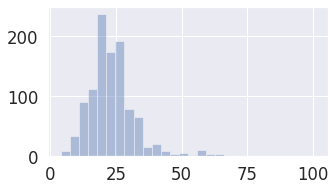

In [6]:
# task_name = 'BBBP'
tasks = ['TARGET']

raw_filename = "/personal/AI4science/mol_all.csv"
feature_filename = raw_filename.replace('.csv','.pickle')
filename = raw_filename.replace('.csv','')
prefix_filename = raw_filename.split('/')[-1].replace('.csv','')
smiles_tasks_df = pd.read_csv(raw_filename)

smilesList = smiles_tasks_df.SMILES.values
print("number of all smiles: ",len(smilesList))

atom_num_dist = []
remained_smiles = []
canonical_smiles_list = []
for smiles in smilesList:
    try:        
        mol = Chem.MolFromSmiles(smiles)
        atom_num_dist.append(len(mol.GetAtoms()))
        remained_smiles.append(smiles)
        canonical_smiles_list.append(Chem.MolToSmiles(Chem.MolFromSmiles(smiles), isomericSmiles=True))
    except:
        print("not successfully processed smiles: ", smiles)
        pass
print("number of successfully processed smiles: ", len(remained_smiles))
smiles_tasks_df = smiles_tasks_df[smiles_tasks_df["SMILES"].isin(remained_smiles)]
# print(smiles_tasks_df)
smiles_tasks_df['cano_smiles'] =canonical_smiles_list
assert canonical_smiles_list[8]==Chem.MolToSmiles(Chem.MolFromSmiles(smiles_tasks_df['cano_smiles'][8]), isomericSmiles=True)

plt.figure(figsize=(5, 3))
sns.set(font_scale=1.5)
ax = sns.distplot(atom_num_dist, bins=28, kde=False)
plt.tight_layout()
# plt.savefig("atom_num_dist_"+prefix_filename+".png",dpi=200)
plt.show()
plt.close()

# print(len([i for i in atom_num_dist if i<51]),len([i for i in atom_num_dist if i>50]))

In [7]:
# random_seed = 2024
random_seed = int(time.time())
start_time = str(time.ctime()).replace(':','-').replace(' ','_')
start = time.time()

batch_size = 200
epochs = 800
p_dropout = 0.1
fingerprint_dim = 150

radius = 3
T = 2
weight_decay = 2.9 # also known as l2_regularization_lambda
learning_rate = 3.5
per_task_output_units_num = 2 # for classification model with 2 classes
output_units_num = len(tasks) * per_task_output_units_num

In [8]:
smilesList = [smiles for smiles in canonical_smiles_list if len(Chem.MolFromSmiles(smiles).GetAtoms())<101]
uncovered = [smiles for smiles in canonical_smiles_list if len(Chem.MolFromSmiles(smiles).GetAtoms())>100]

smiles_tasks_df = smiles_tasks_df[~smiles_tasks_df["cano_smiles"].isin(uncovered)]

if os.path.isfile(feature_filename):
    feature_dicts = pickle.load(open(feature_filename, "rb" ))
else:
    feature_dicts = save_smiles_dicts(smilesList,filename)

feature_dicts = get_smiles_dicts(smilesList)

remained_df = smiles_tasks_df[smiles_tasks_df["cano_smiles"].isin(feature_dicts['smiles_to_atom_mask'].keys())]
uncovered_df = smiles_tasks_df.drop(remained_df.index)
uncovered_df

Empty DataFrame
Columns: [SMILES, TARGET, is_train, cano_smiles]
Index: []

In [9]:
smiles_tasks_df
a = smiles_tasks_df.query("SMILES == 'CC(=O)Nc1ccc(cc1)O'")["cano_smiles"]
b = smiles_tasks_df.loc[smiles_tasks_df['SMILES'] == 'CC(=O)Nc1ccc(cc1)O'].iloc[0]["cano_smiles"]
#b["cano_smiles"]
b

'CC(=O)Nc1ccc(O)cc1'

In [10]:
weights = []
for i,task in enumerate(tasks):    
    negative_df = remained_df[remained_df[task] == 0][["SMILES",task]]
    positive_df = remained_df[remained_df[task] == 1][["SMILES",task]]
    weights.append([(positive_df.shape[0]+negative_df.shape[0])/negative_df.shape[0],\
                    (positive_df.shape[0]+negative_df.shape[0])/positive_df.shape[0]])


test_data = remained_df[remained_df['is_train'] == 0]
# test_df = remained_df.sample(frac=1/10, random_state=random_seed) # test set
training_data = remained_df[remained_df['is_train'] == 1]
training_data = remained_df.drop(test_df.index) # training data


# training data is further divided into validation set and train set
valid_df = training_data.sample(frac=1/9, random_state=random_seed) # validation set
train_df = training_data.drop(valid_df.index) # train set
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
test_df = test_data.reset_index(drop=True)


In [11]:
#print("positive sample", sum(training_data["TARGET"] == 1))
#print("negative sample", sum(training_data["TARGET"] == 0))

print("positive sample", sum(train_df["TARGET"] == 1))
print("negative sample", sum(train_df["TARGET"] == 0))

print("positive sample", sum(valid_df["TARGET"] == 1))
print("negative sample", sum(valid_df["TARGET"] == 0))

print("positive sample", sum(test_data["TARGET"] == 1))
print("negative sample", sum(test_data["TARGET"] == 0))

weights

positive sample 94
negative sample 527
positive sample 24
negative sample 54
positive sample 0
negative sample 366


[[1.3015873015873016, 4.315789473684211]]

In [12]:
x_atom, x_bonds, x_atom_index, x_bond_index, x_mask, smiles_to_rdkit_list = get_smiles_array([smilesList[0]],feature_dicts)
num_atom_features = x_atom.shape[-1]
num_bond_features = x_bonds.shape[-1]

loss_function = [nn.CrossEntropyLoss(torch.Tensor(weight),reduction='mean') for weight in weights]
model = Fingerprint(radius, T, num_atom_features,num_bond_features,
            fingerprint_dim, output_units_num, p_dropout)
model.cuda()
# tensorboard = SummaryWriter(log_dir="runs/"+start_time+"_"+prefix_filename+"_"+str(fingerprint_dim)+"_"+str(p_dropout))

# optimizer = optim.Adam(model.parameters(), learning_rate, weight_decay=weight_decay)
optimizer = optim.Adam(model.parameters(), 10**-learning_rate, weight_decay=10**-weight_decay)
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(params)
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data.shape)
        

649206
atom_fc.weight torch.Size([150, 39])
atom_fc.bias torch.Size([150])
neighbor_fc.weight torch.Size([150, 49])
neighbor_fc.bias torch.Size([150])
GRUCell.0.weight_ih torch.Size([450, 150])
GRUCell.0.weight_hh torch.Size([450, 150])
GRUCell.0.bias_ih torch.Size([450])
GRUCell.0.bias_hh torch.Size([450])
GRUCell.1.weight_ih torch.Size([450, 150])
GRUCell.1.weight_hh torch.Size([450, 150])
GRUCell.1.bias_ih torch.Size([450])
GRUCell.1.bias_hh torch.Size([450])
GRUCell.2.weight_ih torch.Size([450, 150])
GRUCell.2.weight_hh torch.Size([450, 150])
GRUCell.2.bias_ih torch.Size([450])
GRUCell.2.bias_hh torch.Size([450])
align.0.weight torch.Size([1, 300])
align.0.bias torch.Size([1])
align.1.weight torch.Size([1, 300])
align.1.bias torch.Size([1])
align.2.weight torch.Size([1, 300])
align.2.bias torch.Size([1])
attend.0.weight torch.Size([150, 150])
attend.0.bias torch.Size([150])
attend.1.weight torch.Size([150, 150])
attend.1.bias torch.Size([150])
attend.2.weight torch.Size([150, 150])

In [13]:
def train(model, dataset, optimizer, loss_function):
    model.train()
    np.random.seed(epoch)
    valList = np.arange(0,dataset.shape[0])
    #shuffle them
    np.random.shuffle(valList)
    batch_list = []
    for i in range(0, dataset.shape[0], batch_size):
        batch = valList[i:i+batch_size]
        batch_list.append(batch)   
    for counter, train_batch in enumerate(batch_list):
        batch_df = dataset.loc[train_batch,:]
        smiles_list = batch_df.cano_smiles.values
        
        x_atom, x_bonds, x_atom_index, x_bond_index, x_mask, smiles_to_rdkit_list = get_smiles_array(smiles_list,feature_dicts)
        atoms_prediction, mol_prediction = model(torch.Tensor(x_atom),torch.Tensor(x_bonds),torch.cuda.LongTensor(x_atom_index),torch.cuda.LongTensor(x_bond_index),torch.Tensor(x_mask))
#         print(torch.Tensor(x_atom).size(),torch.Tensor(x_bonds).size(),torch.cuda.LongTensor(x_atom_index).size(),torch.cuda.LongTensor(x_bond_index).size(),torch.Tensor(x_mask).size())
        
        model.zero_grad()
        # Step 4. Compute your loss function. (Again, Torch wants the target wrapped in a variable)
        loss = 0.0
        for i,task in enumerate(tasks):
            y_pred = mol_prediction[:, i * per_task_output_units_num:(i + 1) *
                                    per_task_output_units_num]
            y_val = batch_df[task].values

            validInds = np.where((y_val==0) | (y_val==1))[0]
#             validInds = np.where(y_val != -1)[0]
            if len(validInds) == 0:
                continue
            y_val_adjust = np.array([y_val[v] for v in validInds]).astype(float)
            validInds = torch.cuda.LongTensor(validInds).squeeze()
            y_pred_adjust = torch.index_select(y_pred, 0, validInds)

            loss += loss_function[i](
                y_pred_adjust,
                torch.cuda.LongTensor(y_val_adjust))
        # Step 5. Do the backward pass and update the gradient
#             print(y_val,y_pred,validInds,y_val_adjust,y_pred_adjust)
        loss.backward()
        optimizer.step()
def eval(model, dataset):
    model.eval()
    y_val_list = {}
    y_pred_list = {}
    losses_list = []
    valList = np.arange(0,dataset.shape[0])
    batch_list = []
    for i in range(0, dataset.shape[0], batch_size):
        batch = valList[i:i+batch_size]
        batch_list.append(batch)   
    for counter, test_batch in enumerate(batch_list):
        batch_df = dataset.loc[test_batch,:]
        smiles_list = batch_df.cano_smiles.values
        x_atom, x_bonds, x_atom_index, x_bond_index, x_mask, smiles_to_rdkit_list = get_smiles_array(smiles_list,feature_dicts)
        atoms_prediction, mol_prediction = model(torch.Tensor(x_atom),torch.Tensor(x_bonds),torch.cuda.LongTensor(x_atom_index),torch.cuda.LongTensor(x_bond_index),torch.Tensor(x_mask))
        atom_pred = atoms_prediction.data[:,:,1].unsqueeze(2).cpu().numpy()
        for i,task in enumerate(tasks):
            y_pred = mol_prediction[:, i * per_task_output_units_num:(i + 1) *
                                    per_task_output_units_num]
            y_val = batch_df[task].values

            validInds = np.where((y_val==0) | (y_val==1))[0]
#             validInds = np.where((y_val=='0') | (y_val=='1'))[0]
#             print(validInds)
            if len(validInds) == 0:
                continue
            y_val_adjust = np.array([y_val[v] for v in validInds]).astype(float)
            validInds = torch.cuda.LongTensor(validInds).squeeze()
            y_pred_adjust = torch.index_select(y_pred, 0, validInds)
#             print(validInds)
            loss = loss_function[i](
                y_pred_adjust,
                torch.cuda.LongTensor(y_val_adjust))
#             print(y_pred_adjust)
            y_pred_adjust = F.softmax(y_pred_adjust,dim=-1).data.cpu().numpy()[:,1]
            losses_list.append(loss.cpu().detach().numpy())
            try:
                y_val_list[i].extend(y_val_adjust)
                y_pred_list[i].extend(y_pred_adjust)
            except:
                y_val_list[i] = []
                y_pred_list[i] = []
                y_val_list[i].extend(y_val_adjust)
                y_pred_list[i].extend(y_pred_adjust)
#             print(y_val,y_pred,validInds,y_val_adjust,y_pred_adjust)            
    # test_roc = [roc_auc_score(y_val_list[i], y_pred_list[i]) for i in range(len(tasks))]
    # test_prc = [auc(precision_recall_curve(y_val_list[i], y_pred_list[i])[1],precision_recall_curve(y_val_list[i], y_pred_list[i])[0]) for i in range(len(tasks))]
#     test_prc = auc(recall, precision)
    # test_precision = [precision_score(y_val_list[i],
    #                                 (np.array(y_pred_list[i]) > 0.5).astype(int)) for i in range(len(tasks))]
    # test_recall = [recall_score(y_val_list[i],
    #                           (np.array(y_pred_list[i]) > 0.5).astype(int)) for i in range(len(tasks))]
    test_loss = np.array(losses_list).mean()
    test_f2_score = [fbeta_score(y_val_list[i],
                            (np.array(y_pred_list[i]) > 0.5).astype(int), 
                            beta=2) for i in range(len(tasks))]
    return y_pred_list, test_loss, test_f2_score


In [14]:
best_param ={}
best_param["f2_epoch"] = 0
# best_param["roc_epoch"] = 0
best_param["loss_epoch"] = 0
# best_param["valid_roc"] = 0
best_param["valid_f2"] = 0
best_param["valid_loss"] = 9e8

import shutil

directory = 'AFP_saved_models/'

files = os.listdir(directory)

for file in files:
    file_path = os.path.join(directory, file)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))
        

for epoch in range(epochs):    
    train_pred, train_loss, train_f2 = eval(model, train_df)
    valid_pred, valid_loss, valid_f2 = eval(model, valid_df)
    # train_roc_mean = np.array(train_roc).mean()
    # valid_roc_mean = np.array(valid_roc).mean()
    train_f2_mean = np.array(train_f2).mean()
    valid_f2_mean = np.array(valid_f2).mean()
    
#     tensorboard.add_scalars('ROC',{'train_roc':train_roc_mean,'valid_roc':valid_roc_mean},epoch)
#     tensorboard.add_scalars('Losses',{'train_losses':train_loss,'valid_losses':valid_loss},epoch)
             
    if valid_f2_mean > best_param["valid_f2"]:
        best_param["f2_epoch"] = epoch
        best_param["valid_f2"] = valid_f2_mean
        if valid_f2_mean > 0.70:
             torch.save(model, 'AFP_saved_models/model_'+prefix_filename+'_'+start_time+'_'+str(epoch)+'.pt')         
    if valid_loss < best_param["valid_loss"]:
        best_param["loss_epoch"] = epoch
        best_param["valid_loss"] = valid_loss

    print("EPOCH:\t"+str(epoch)+'\n'\
        +"train_f2"+":"+str(train_f2)+'\n'\
        +"valid_f2"+":"+str(valid_f2)+'\n'\
        # +"train_f2_mean"+":"+str(train_f2_mean)+'\n'\
        # +"valid_f2_mean"+":"+str(valid_f2_mean)+'\n'\
        )
    if (epoch - best_param["f2_epoch"] >18) and (epoch - best_param["loss_epoch"] >28):        
        break
        
    train(model, train_df, optimizer, loss_function)


EPOCH:	0
train_f2:[0.0]
valid_f2:[0.0]

EPOCH:	1
train_f2:[0.0]
valid_f2:[0.0]

EPOCH:	2
train_f2:[0.0]
valid_f2:[0.0]

EPOCH:	3
train_f2:[0.0]
valid_f2:[0.0]

EPOCH:	4
train_f2:[0.0]
valid_f2:[0.0]

EPOCH:	5
train_f2:[0.0]
valid_f2:[0.0]

EPOCH:	6
train_f2:[0.0]
valid_f2:[0.0]

EPOCH:	7
train_f2:[0.0]
valid_f2:[0.0]

EPOCH:	8
train_f2:[0.0]
valid_f2:[0.0]

EPOCH:	9
train_f2:[0.0]
valid_f2:[0.0]

EPOCH:	10
train_f2:[0.0]
valid_f2:[0.0]

EPOCH:	11
train_f2:[0.0]
valid_f2:[0.0]

EPOCH:	12
train_f2:[0.0]
valid_f2:[0.0]

EPOCH:	13
train_f2:[0.0]
valid_f2:[0.05102040816326531]

EPOCH:	14
train_f2:[0.41015625000000006]
valid_f2:[0.47413793103448265]

EPOCH:	15
train_f2:[0.19184652278177458]
valid_f2:[0.14423076923076922]

EPOCH:	16
train_f2:[0.0]
valid_f2:[0.0]

EPOCH:	17
train_f2:[0.0]
valid_f2:[0.0]

EPOCH:	18
train_f2:[0.07633587786259542]
valid_f2:[0.0505050505050505]

EPOCH:	19
train_f2:[0.05154639175257732]
valid_f2:[0.0505050505050505]

EPOCH:	20
train_f2:[0.026246719160104987]
valid_

In [15]:
# evaluate model
best_model = torch.load('AFP_saved_models/model_'+prefix_filename+'_'+start_time+'_'+str(best_param["f2_epoch"])+'.pt')     

best_model_dict = best_model.state_dict()
best_model_wts = copy.deepcopy(best_model_dict)

# model.load_state_dict(best_model_wts)
# (best_model.align[0].weight == model.align[0].weight).all()

test_pred, test_loss, test_f2 = eval(best_model, test_df)

# print("best epoch:"+str(best_param["f2_epoch"])
#       +"\n"+"test_f2:"+str(test_f2)
#       +"\n"+"test_f2_mean:",str(np.array(test_f2).mean())
#      )

In [16]:
threshold = 0.6
result = [1 if x > threshold else 0 for x in test_pred[0]]

submission = pd.DataFrame()  # 创建预测结果 DataFrame
submission["SMILES"] = test_data["SMILES"]  # 复制对应的 SMILES 内容
submission["TARGET"] = result  # 填写预测标签结果
submission.to_csv("./submission.csv", index=False) 

In [17]:
sum(result)/len(result)

0.1721311475409836

In [18]:
# Feature visualization
# from AttentiveFP.AttentiveLayers_viz_not_activated import Fingerprint_viz
model_for_viz = Fingerprint_viz(radius, T, num_atom_features, num_bond_features,
            fingerprint_dim, output_units_num, p_dropout)
model_for_viz.cuda()

model_for_viz.load_state_dict(best_model_wts)
(best_model.align[0].weight == model_for_viz.align[0].weight).all()

tensor(True)

In [19]:
def eval_for_viz(model, viz_list):
    model.eval()
    test_MAE_list = []
    test_MSE_list = []
    mol_prediction_list = []
    atom_feature_list = []
    atom_weight_list = []
    mol_feature_list = []
    mol_feature_unbounded_list = []
    batch_list = []
    for i in range(0, len(viz_list), batch_size):
        batch = viz_list[i:i+batch_size]
        batch_list.append(batch) 
    for counter, batch in enumerate(batch_list):        
        x_atom, x_bonds, x_atom_index, x_bond_index, x_mask, smiles_to_rdkit_list = get_smiles_array(viz_list,get_smiles_dicts(batch))
        atom_feature_viz, atom_attention_weight_viz, mol_feature_viz, mol_feature_unbounded_viz, mol_attention_weight_viz, mol_prediction = model(
            torch.Tensor(x_atom), torch.Tensor(x_bonds),
            torch.cuda.LongTensor(x_atom_index),
            torch.cuda.LongTensor(x_bond_index),
            torch.Tensor(x_mask))

        mol_prediction_list.append(mol_prediction.cpu().detach().squeeze().numpy())
        atom_feature_list.append(np.stack([atom_feature_viz[L].cpu().detach().numpy() for L in range(radius+1)]))
        atom_weight_list.append(np.stack([mol_attention_weight_viz[t].cpu().detach().numpy() for t in range(T)]))
        mol_feature_list.append(np.stack([mol_feature_viz[t].cpu().detach().numpy() for t in range(T)]))
        mol_feature_unbounded_list.append(np.stack([mol_feature_unbounded_viz[t].cpu().detach().numpy() for t in range(T)]))
        
    mol_prediction_array = np.concatenate(mol_prediction_list,axis=0)
    atom_feature_array = np.concatenate(atom_feature_list,axis=1)
    atom_weight_array = np.concatenate(atom_weight_list,axis=1)
    mol_feature_array = np.concatenate(mol_feature_list,axis=1)
    mol_feature_unbounded_array = np.concatenate(mol_feature_unbounded_list,axis=1)
#     print(mol_prediction_array.shape, atom_feature_array.shape, atom_weight_array.shape, mol_feature_array.shape)
    return mol_prediction_array, atom_feature_array, atom_weight_array, mol_feature_array, mol_feature_unbounded_array

In [20]:
viz_list_smiles = ['CC1OC(=O)CC(O)CC(O)CC(O)CCC(O)C(O)CC(=O)CC(O)C(C(O)CC(OC2OC(C)C(O)C(N)C2O)C=CC=CC=CC=CCCC=CC=CC(C)C(O)C1C)C(=O)O',
            'CCCN(CCC)C(=O)C(CCC(=O)OCCCN1CCN(CCOC(=O)Cc2c(C)n(C(=O)c3ccc(Cl)cc3)c4ccc(OC)cc24)CC1)NC(=O)c5ccccc5',
            '[H][C@]12C[C@@]3([H])[C@H](N(C)C)C(O)=C(C(N)=O)C(=O)[C@@]3(O)C(O)=C1C(=O)C1=C([C@H]2O)C(Cl)=CC=C1O',
            '[H][C@@]1(CC[C@]2(O)[C@]3([H])CCC4=C[C@]([H])(CC[C@]4(C)[C@@]3([H])CC[C@]12C)O[C@]1([H])O[C@@]([H])(C)[C@]([H])(O)[C@@]([H])(O)[C@@]1([H])O)C1=COC(=O)C=C1']
    

# viz_list = []

# for smiles in viz_list_smiles:
#     cano = smiles_tasks_df.loc[smiles_tasks_df['SMILES'] == smiles.iloc[0]["cano_smiles"]
#                                viz_list.append(cano)
                               
# print(viz_list)


# viz_list = []

# for smiles in viz_list_smiles:
#     # Find the row where SMILES matches and get the first such row
#     matched_row = (smiles_tasks_df.loc[smiles_tasks_df['SMILES'] == smiles]).iloc[0]
    
#     # Get the 'cano_smiles' value from the matched row
#     cano = matched_row['cano_smiles']
    
#     # Append the 'cano_smiles' value to viz_list
#     viz_list.append(cano)

# print(viz_list)

viz_list = []

for smiles in viz_list_smiles:
    # Find the rows where SMILES matches
    matched_rows = smiles_tasks_df.loc[smiles_tasks_df['SMILES'] == smiles]
    
    # Check if the matched_rows DataFrame is not empty
    if not matched_rows.empty:
        # Get the 'cano_smiles' value from the first matched row
        cano = matched_rows.iloc[0]['cano_smiles']
        # Append the 'cano_smiles' value to viz_list
        viz_list.append(cano)
    else:
        # Handle the case where no matching row is found
        # For example, append None or a custom placeholder
        viz_list.append(None)

print(viz_list)



mol_prediction_array, atom_feature_array, atom_weight_array, mol_feature_array, mol_feature_unbounded_array =  eval_for_viz(model_for_viz, viz_list)
x_atom, x_bonds, x_atom_index, x_bond_index, x_mask, smiles_to_rdkit_list = get_smiles_array(viz_list, feature_dicts)



['CC1C=CC=CCCC=CC=CC=CC=CC(OC2OC(C)C(O)C(N)C2O)CC(O)C(C(=O)O)C(O)CC(=O)CC(O)C(O)CCC(O)CC(O)CC(O)CC(=O)OC(C)C(C)C1O', 'CCCN(CCC)C(=O)C(CCC(=O)OCCCN1CCN(CCOC(=O)Cc2c(C)n(C(=O)c3ccc(Cl)cc3)c3ccc(OC)cc23)CC1)NC(=O)c1ccccc1', 'CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C3C(=O)c4c(O)ccc(Cl)c4[C@@H](O)[C@H]3C[C@@H]12', 'C[C@@H]1O[C@@H](O[C@@H]2C=C3CC[C@@H]4[C@H](CC[C@]5(C)[C@@H](c6ccc(=O)oc6)CC[C@]45O)[C@@]3(C)CC2)[C@H](O)[C@H](O)[C@H]1O']


[23:39:32] The new font size 0.56 is below the current minimum (6).


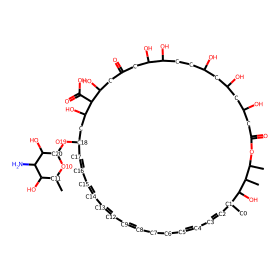

<Figure size 1800x1200 with 0 Axes>

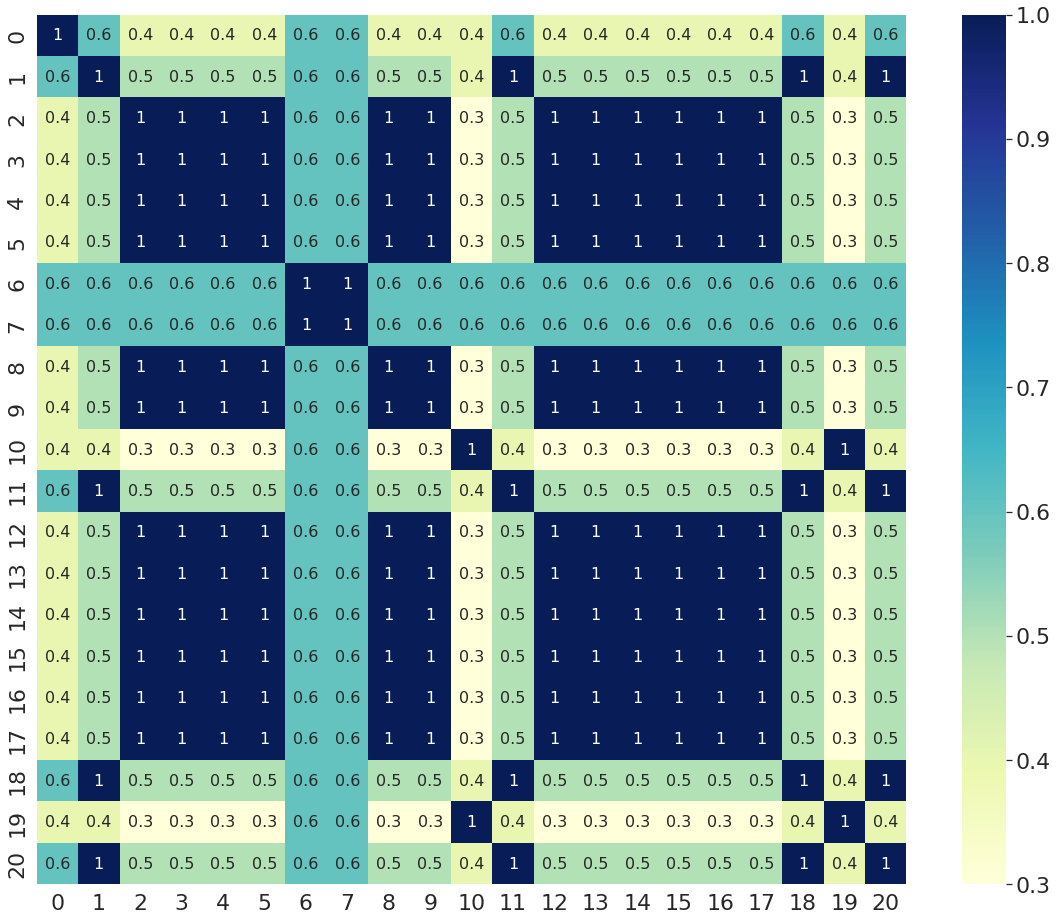

<Figure size 1800x1200 with 0 Axes>

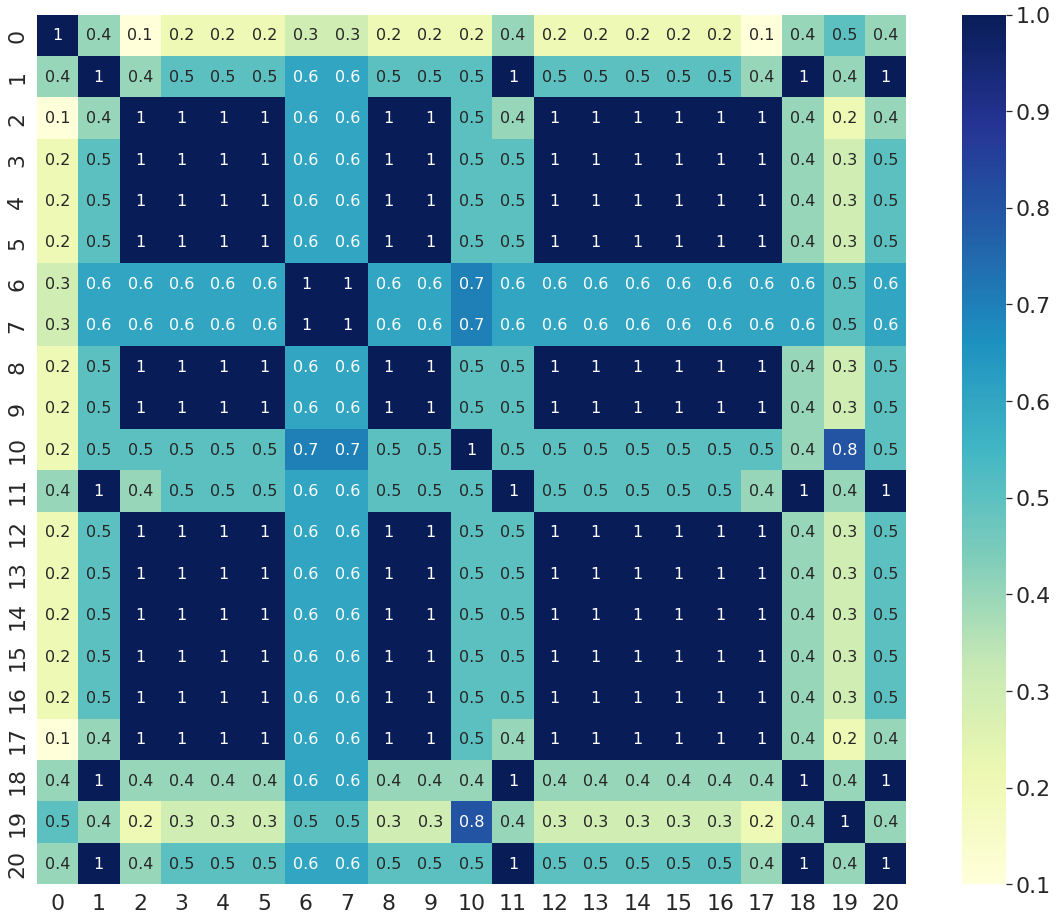

<Figure size 1800x1200 with 0 Axes>

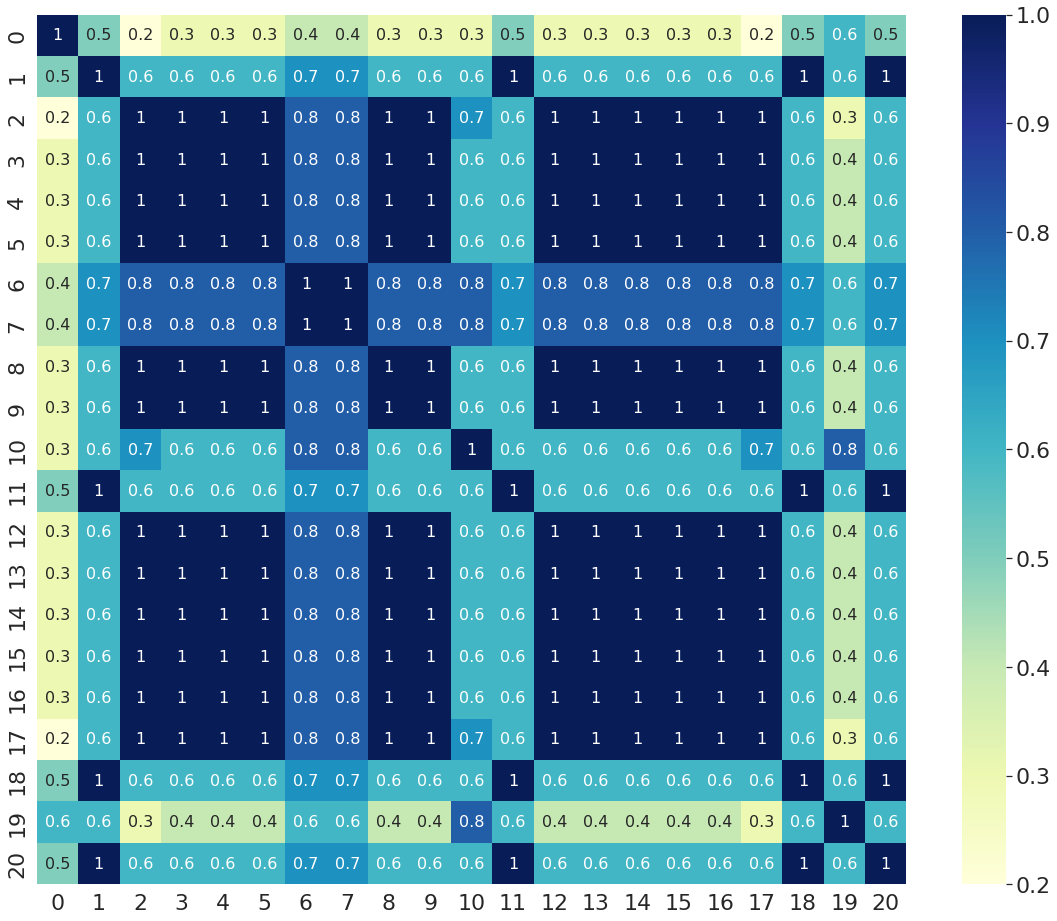

<Figure size 1800x1200 with 0 Axes>

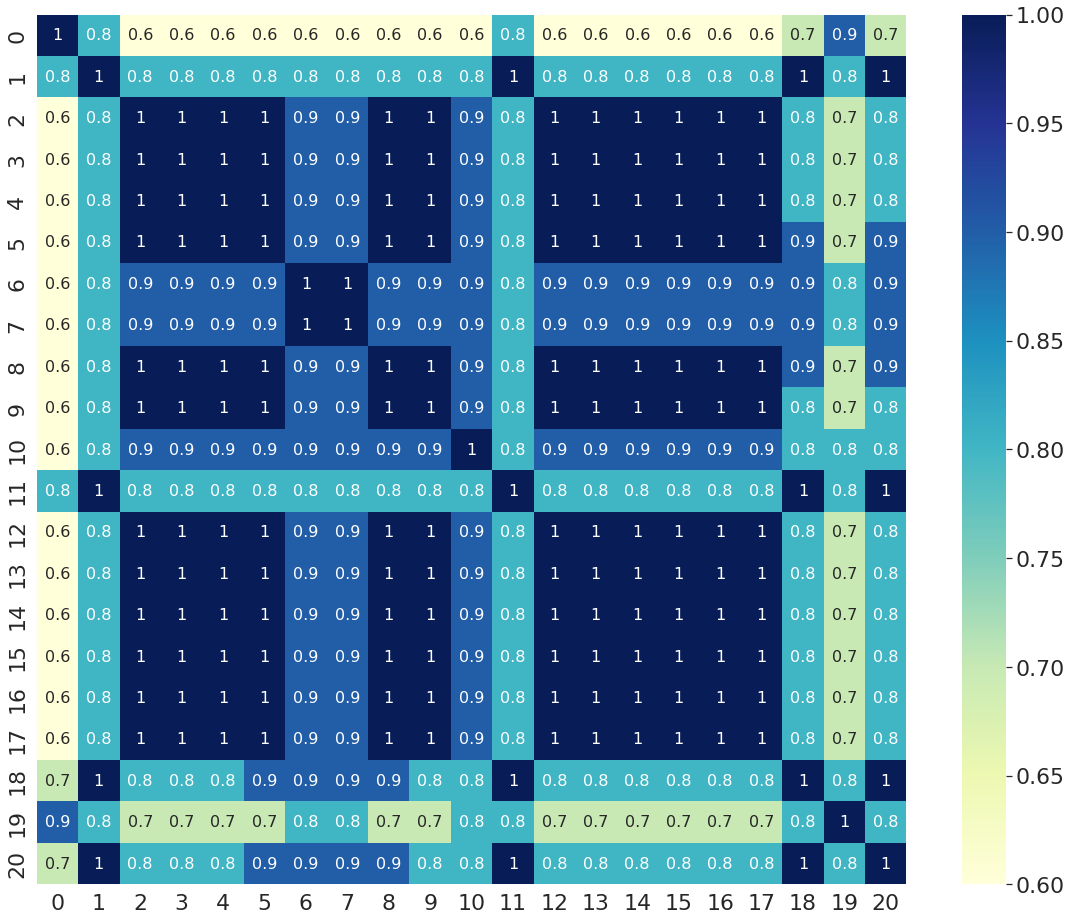

[23:39:39] The new font size 0.56 is below the current minimum (6).


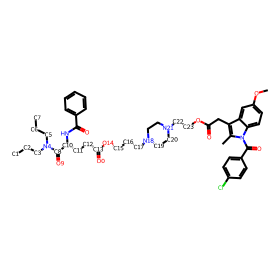

<Figure size 1800x1200 with 0 Axes>

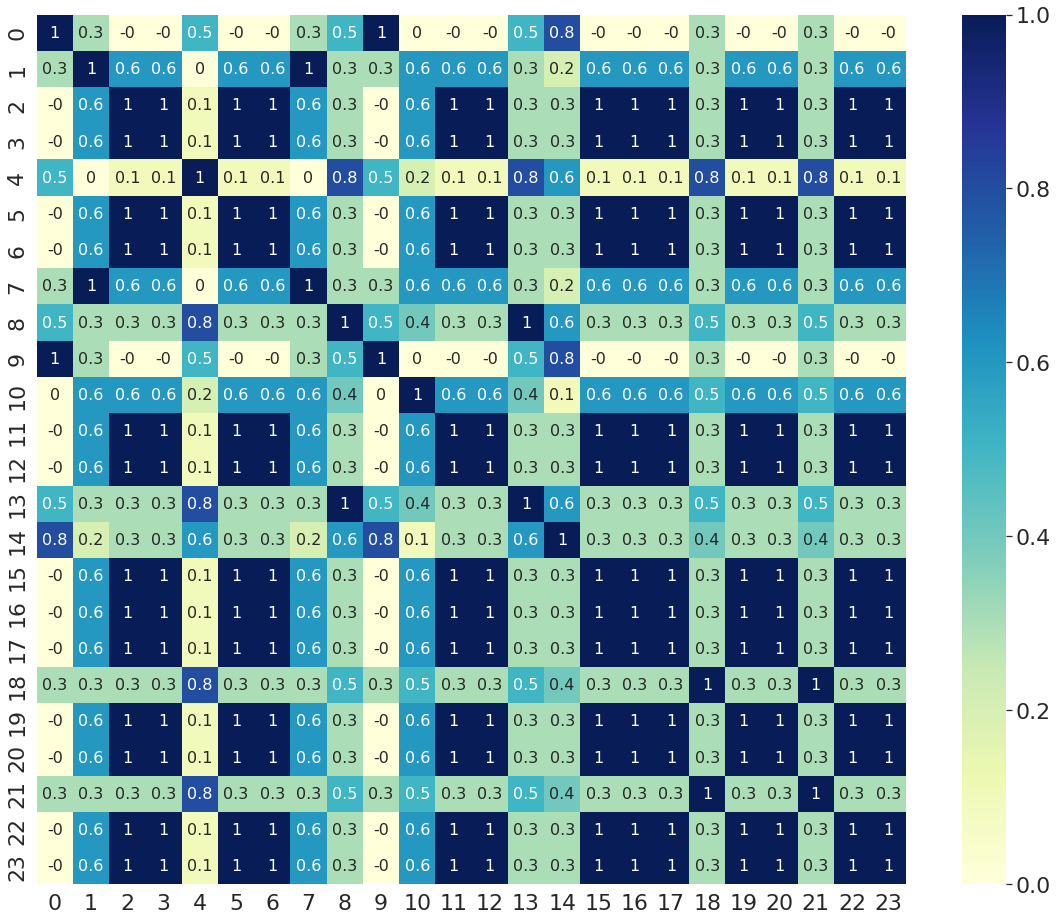

<Figure size 1800x1200 with 0 Axes>

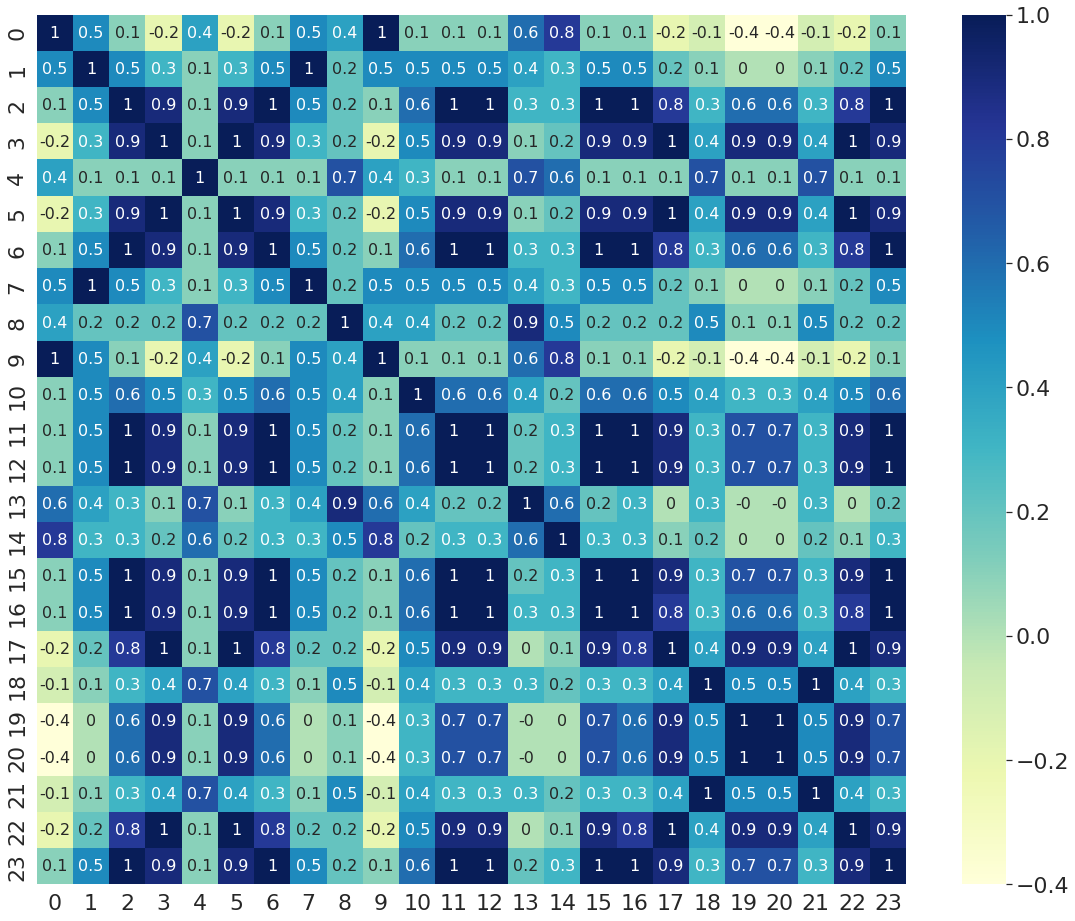

<Figure size 1800x1200 with 0 Axes>

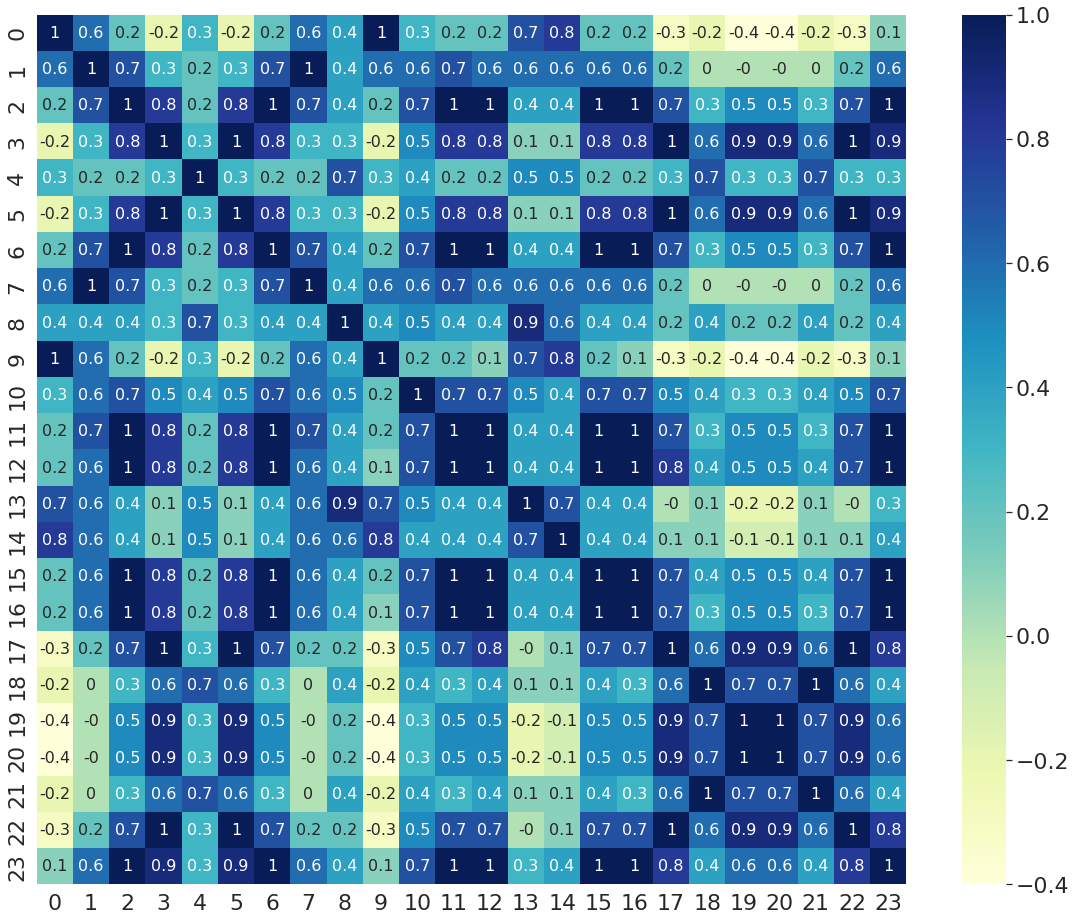

<Figure size 1800x1200 with 0 Axes>

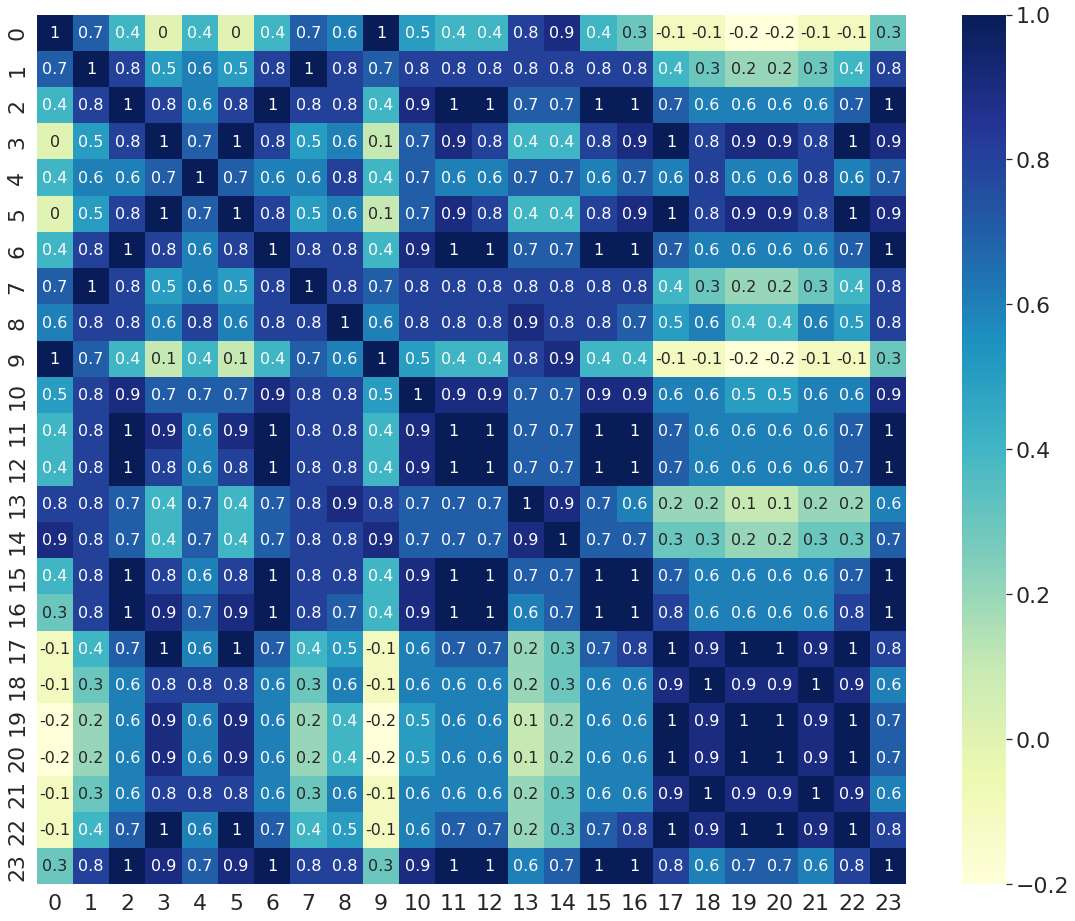

[23:39:46] The new font size 0.56 is below the current minimum (6).


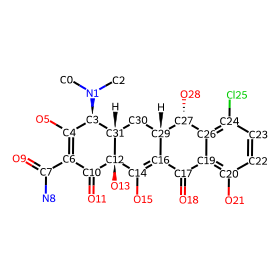

<Figure size 1800x1200 with 0 Axes>

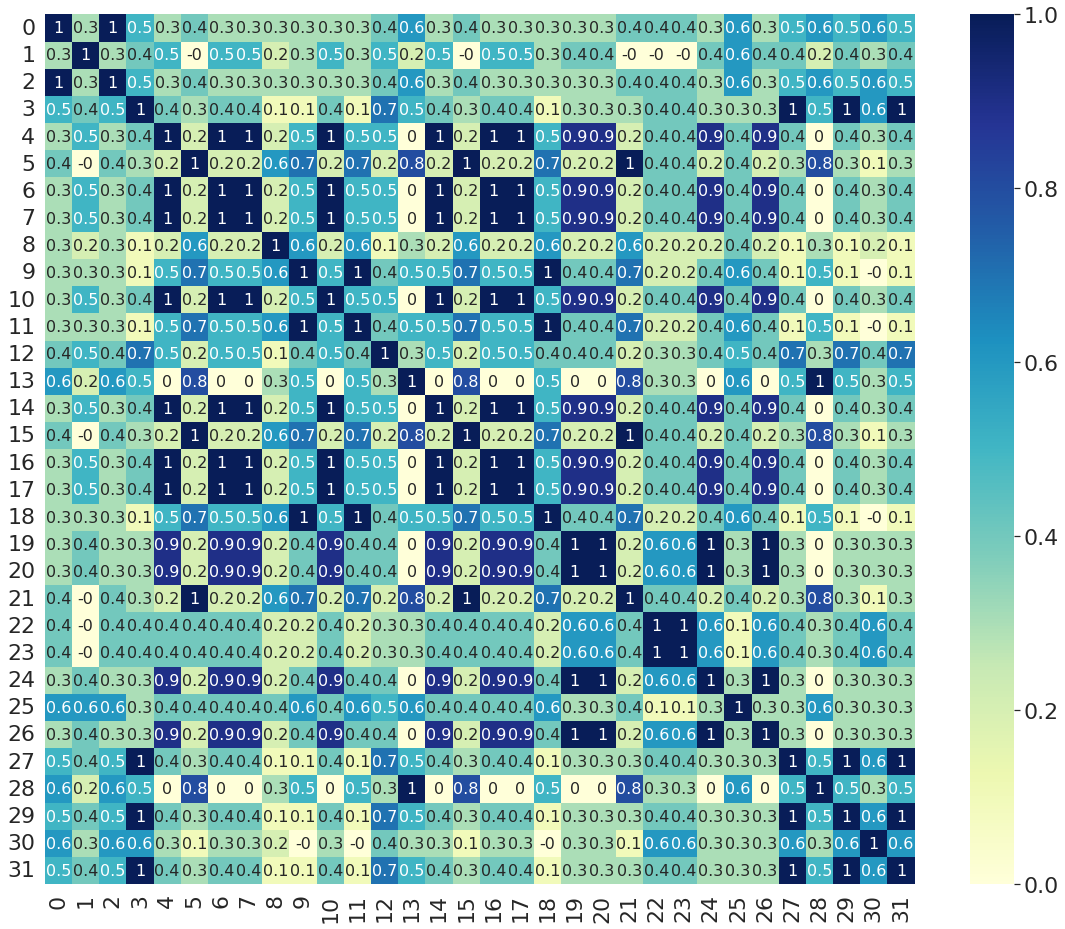

<Figure size 1800x1200 with 0 Axes>

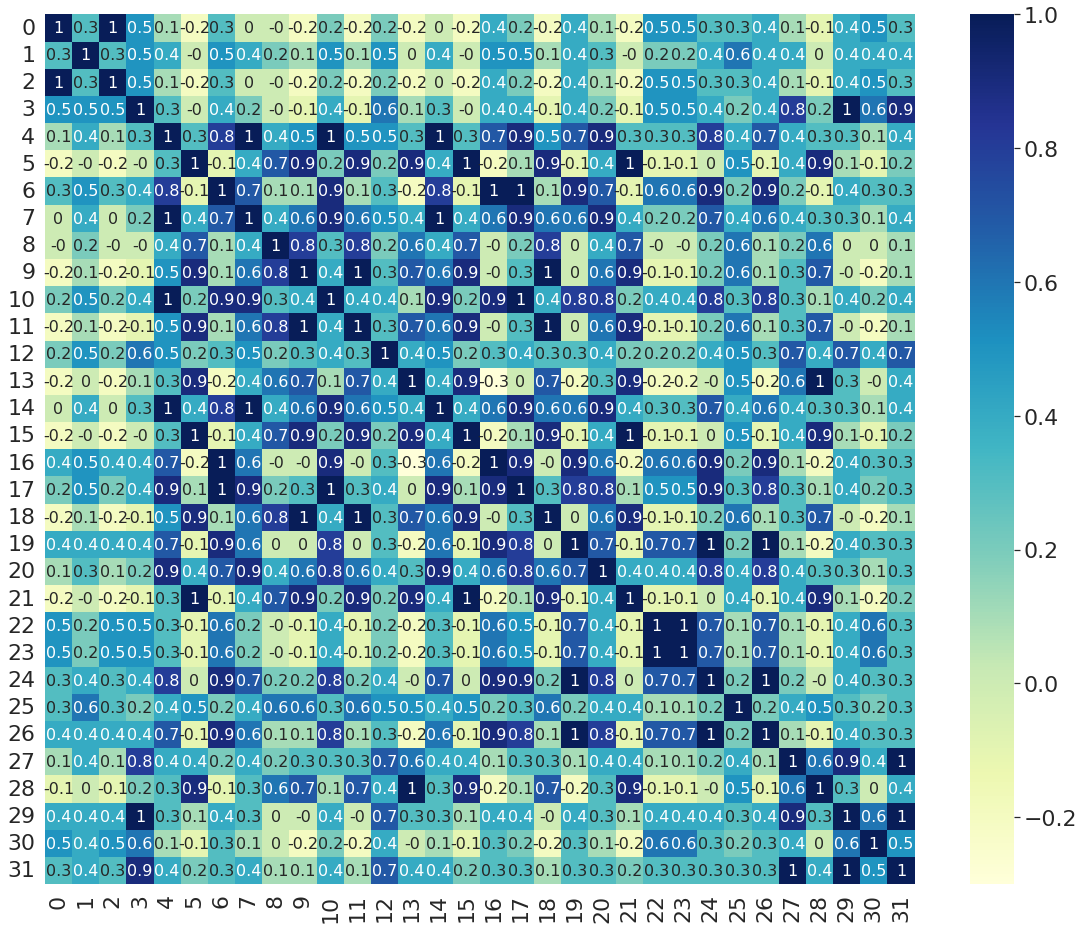

<Figure size 1800x1200 with 0 Axes>

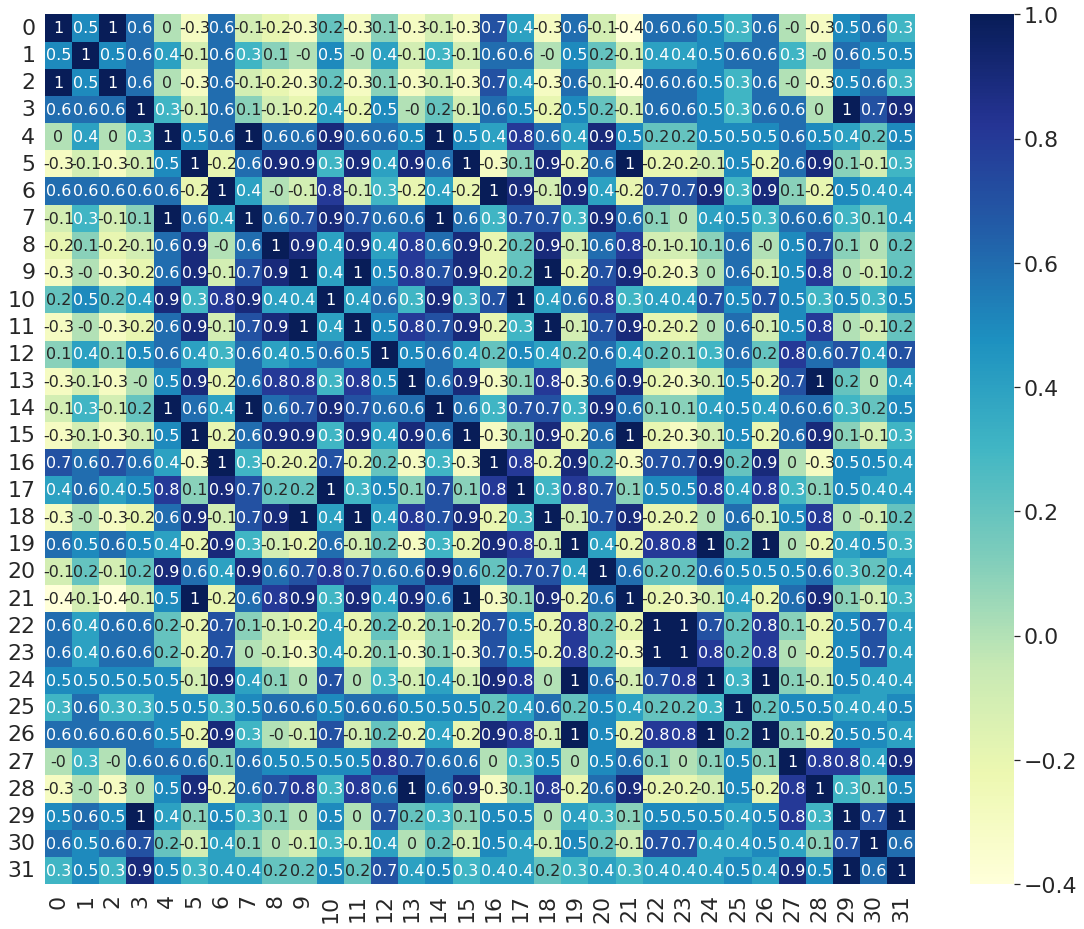

<Figure size 1800x1200 with 0 Axes>

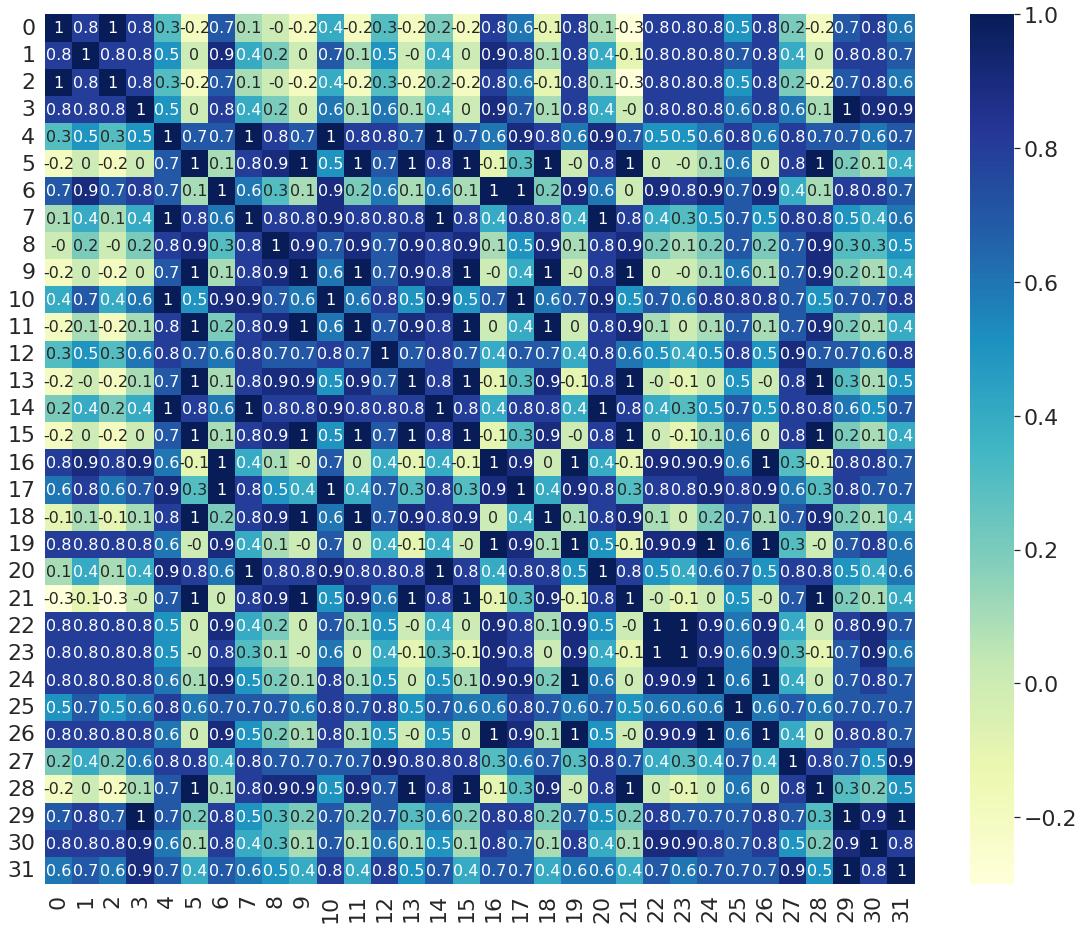

[23:40:00] The new font size 0.56 is below the current minimum (6).


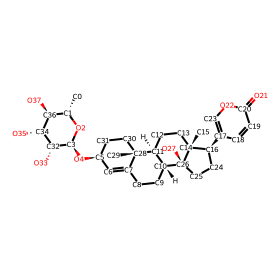

<Figure size 1800x1200 with 0 Axes>

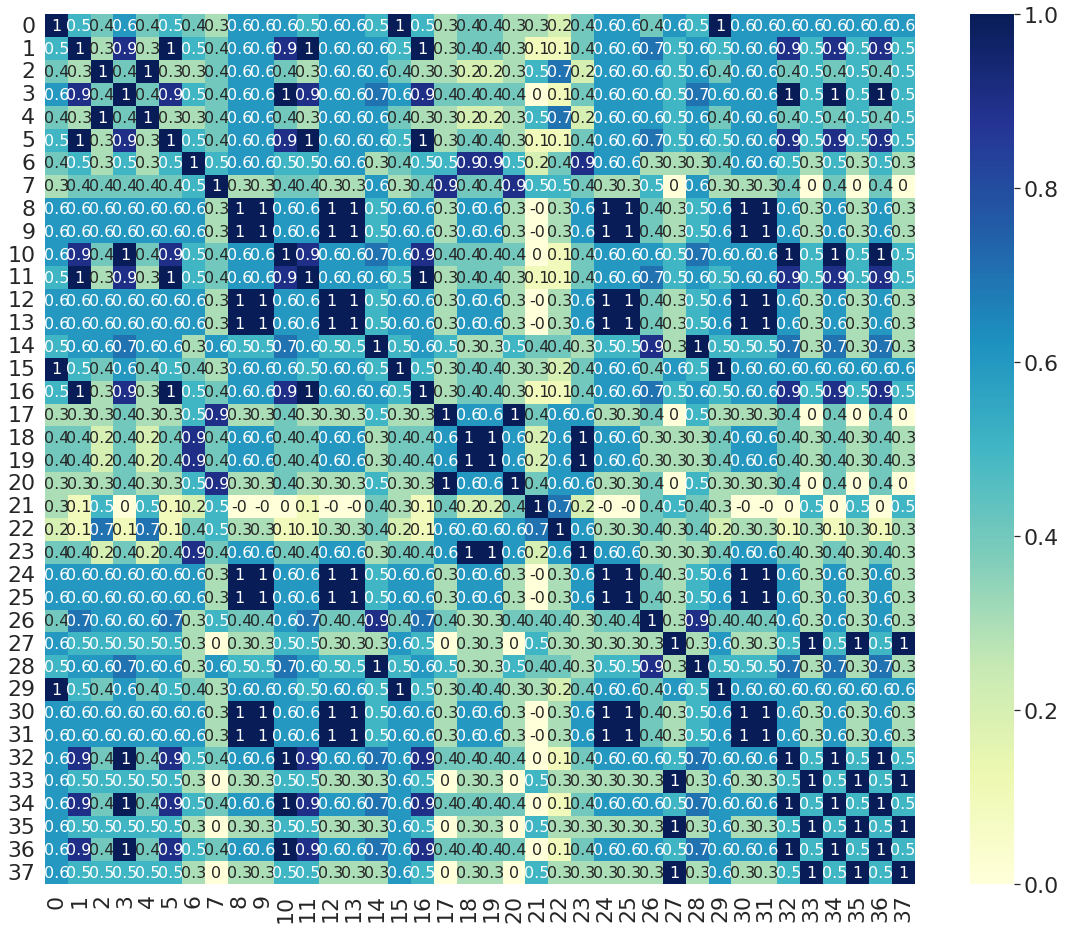

<Figure size 1800x1200 with 0 Axes>

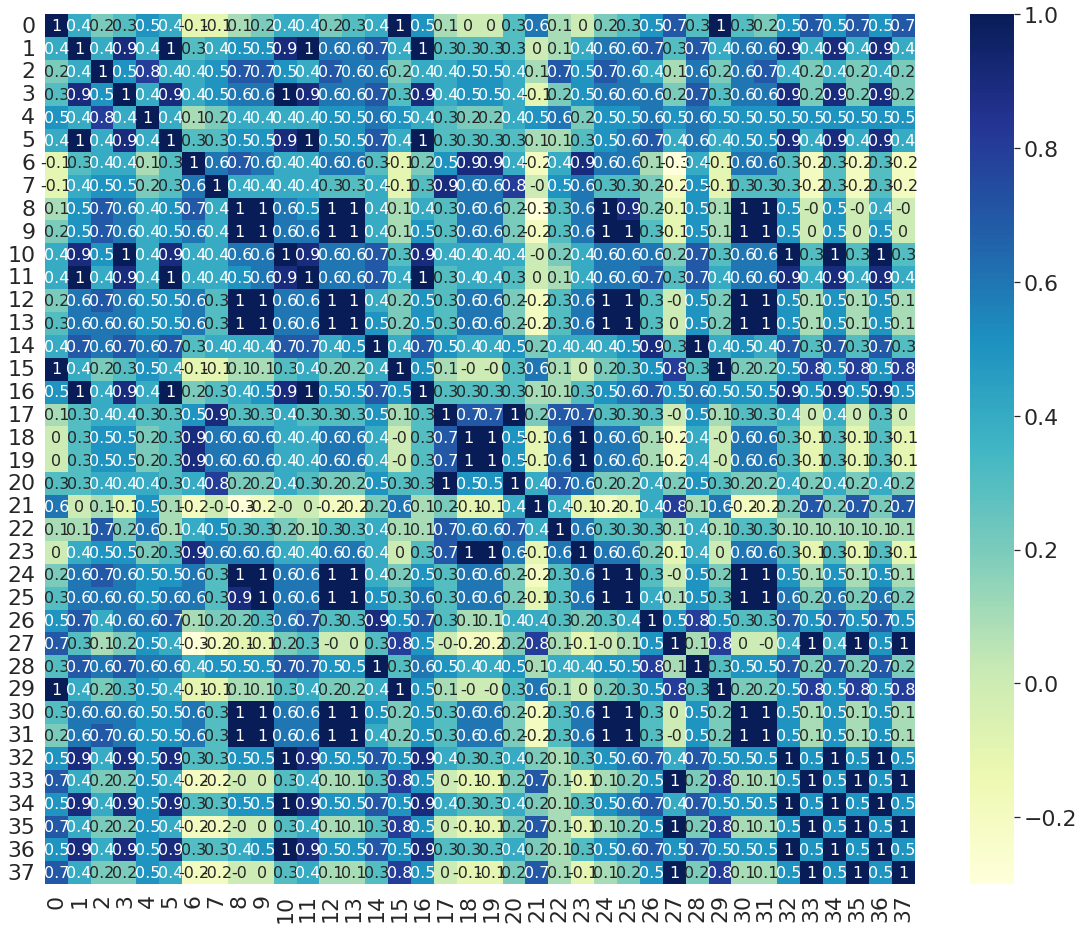

<Figure size 1800x1200 with 0 Axes>

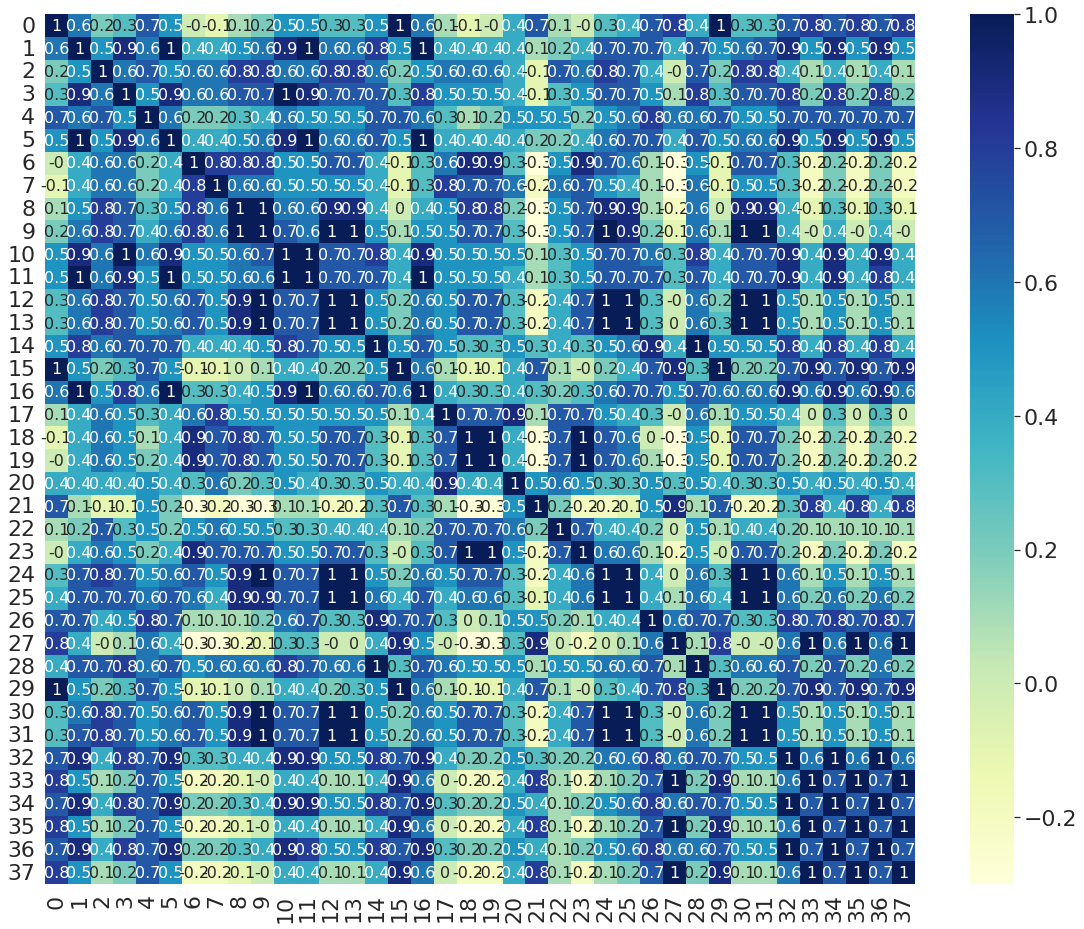

<Figure size 1800x1200 with 0 Axes>

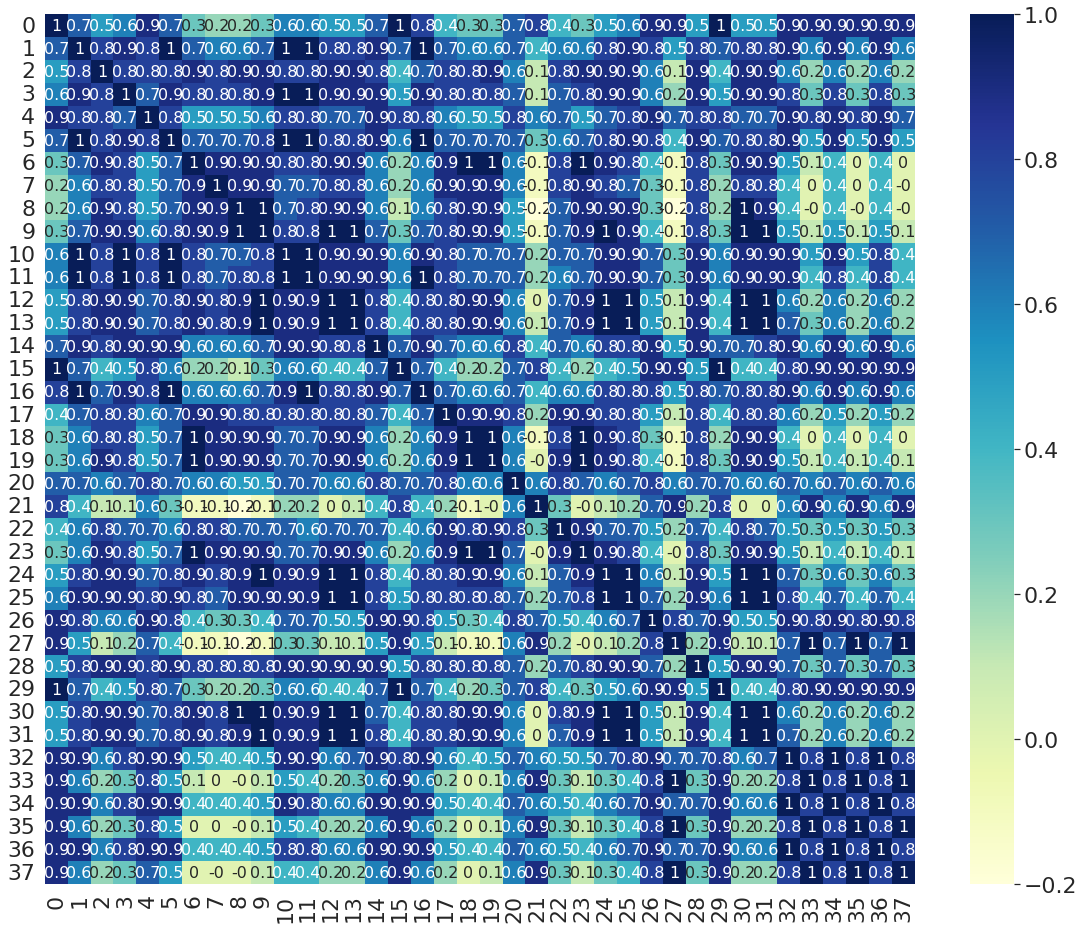

In [21]:
feature_sorted = []
weight_sorted = []

for i, smiles in enumerate(viz_list):
#     draw molecules in svg format
    atom_mask = x_mask[i]
    index_atom = smiles_to_rdkit_list[smiles]
    atom_feature = atom_feature_array[:, i]
    atom_weight = atom_weight_array[:, i]
    mol_prediction = mol_prediction_array[i]
    mol_feature = mol_feature_array[:, i]
    feature_list = []
    weight_list = []
    feature_reorder = []
    weight_reorder = []
    for j, one_or_zero in enumerate(atom_mask):
        if one_or_zero == 1.0:
            feature_list.append(atom_feature[:,j])
            weight_list.append(atom_weight[:,j])
            
    feature_reorder = np.stack([feature_list[m] for m in np.argsort(index_atom)])
    weight_reorder = np.stack([weight_list[m] for m in np.argsort(index_atom)])
#     reorder for draw
    if i == 0:    
        draw_index = [0,1,2,3,4,5,6,7,8,9,12,13,14,15,16,17,18,19,20,10,11]
        feature_reorder = np.stack([feature_reorder[m] for m in np.argsort(draw_index)])
        weight_reorder = np.stack([weight_list[m] for m in np.argsort(draw_index)])
    elif i == 1:
        draw_index = [1,2,3,4,5,6,7,8,9,10,11,12,13,0,14,15,16,17,18,19,20,21,22,23]
        feature_reorder = np.stack([feature_reorder[m] for m in np.argsort(draw_index)])
        weight_reorder = np.stack([weight_list[m] for m in np.argsort(draw_index)])
    else: # using rdkit index directly
        draw_index = list(range(len(index_atom)))
#     print(feature_reorder[0].shape,weight_list[0].shape)
    feature_sorted.append(feature_reorder)
    weight_sorted.append(weight_reorder)
    
    mol = Chem.MolFromSmiles(smiles)

    drawer = rdMolDraw2D.MolDraw2DSVG(280,280)
    drawer.SetFontSize(0.56)
    op = drawer.drawOptions()
    for index, re_index in enumerate(draw_index):
        op.atomLabels[index]=mol.GetAtomWithIdx(index).GetSymbol() + str(re_index)

    mol = rdMolDraw2D.PrepareMolForDrawing(mol)
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    svg2 = svg.replace('svg:','')
    svg3 = SVG(svg2)
    display(svg3)
    
    intra_mol_correlation = [np.corrcoef(feature_reorder[:,L]) for L in range(radius+1)]
    sns.set(font_scale=2)
    
    for L in range(radius+1):
        plt.figure(dpi=300)
        fig, ax = plt.subplots(figsize=(20,16))
        mask = np.zeros_like(intra_mol_correlation[L])
        mask[np.triu_indices_from(mask)] = False
        sns.heatmap(np.around(intra_mol_correlation[L],1),cmap="YlGnBu", annot=True, ax=ax, mask=mask, square=True, annot_kws={"size": 16})
    plt.show()
    plt.close()


In [22]:
import sascorer
test_MAE_list = []
test_MSE_list = []

out_feature_sorted = []
out_weight_sorted = []
mol_feature_sorted = []
mol_feature_unbounded_sorted = []
# partial_charge_list = []
# refractivity_list = []
# mol_refractivity_list = []
# log_p_list = []
mol_LogP_list = []
mol_TPSA_list = []
mol_DrugLike_list = []
mol_SAScore_list = []

batch_list = []
dataset = remained_df.reset_index(drop=True)
valList = np.arange(0,dataset.shape[0])
for i in range(0, dataset.shape[0], batch_size):
    batch = valList[i:i+batch_size]
    batch_list.append(batch) 
for counter, batch in enumerate(batch_list):
    batch_df = dataset.loc[batch,:]
    smiles_list = batch_df.cano_smiles.values
    y_val = batch_df[tasks[0]].values

    x_atom, x_bonds, x_atom_index, x_bond_index, x_mask, smiles_to_rdkit_list = get_smiles_array(smiles_list,feature_dicts)

    atom_feature_viz, atom_attention_weight_viz, mol_feature_viz, mol_feature_unbounded_viz, mol_attention_weight_viz, mol_prediction = model_for_viz(
        torch.Tensor(x_atom), torch.Tensor(x_bonds),
        torch.cuda.LongTensor(x_atom_index),
        torch.cuda.LongTensor(x_bond_index),
        torch.Tensor(x_mask))
    
    MAE = F.l1_loss(mol_prediction, torch.Tensor(y_val).view(-1,1), reduction="none")        
    MSE = F.mse_loss(mol_prediction, torch.Tensor(y_val).view(-1,1), reduction="none")        
    test_MAE_list.extend(MAE.data.squeeze().cpu().numpy())
    test_MSE_list.extend(MSE.data.squeeze().cpu().numpy())

    mol_pred = np.array(mol_prediction.cpu().detach().numpy().squeeze())
    atom_feature = np.stack([atom_feature_viz[L].cpu().detach().numpy() for L in range(radius+1)])
    atom_weight = np.stack([mol_attention_weight_viz[t].cpu().detach().numpy() for t in range(T)])
    mol_feature = np.stack([mol_feature_viz[t].cpu().detach().numpy() for t in range(T+1)])
    mol_feature_sorted.extend([mol_feature[:,i,:] for i in range(mol_feature.shape[1])])
    mol_feature_unbounded = np.stack([mol_feature_unbounded_viz[t].cpu().detach().numpy() for t in range(T+1)])
    mol_feature_unbounded_sorted.extend([mol_feature_unbounded[:,i,:] for i in range(mol_feature_unbounded.shape[1])])
    for i, smiles in enumerate(smiles_list):
        ind_mask = x_mask[i]
        ind_atom = smiles_to_rdkit_list[smiles]
        ind_feature = atom_feature[:, i]
        ind_weight = atom_weight[:, i]
        out_atom = []
        out_pred = []
        out_feature = []
        out_weight = []
        for j, one_or_zero in enumerate(list(ind_mask)):
            if one_or_zero == 1.0:
                out_feature.append(ind_feature[:,j])
                out_weight.append(ind_weight[:,j])
        out_feature_sorted.extend([out_feature[m] for m in np.argsort(ind_atom)])
        out_weight_sorted.extend([out_weight[m] for m in np.argsort(ind_atom)])        
        
        mol = Chem.MolFromSmiles(smiles)
        mol_Crippen = rdMolDescriptors.CalcCrippenDescriptors(mol)
        mol_LogP_list.append(mol_Crippen[0])
        mol_TPSA = MolSurf.TPSA(mol)
        mol_TPSA_list.append(mol_TPSA)
        mol_QED = QED.qed(mol)
        mol_DrugLike_list.append(mol_QED)
        mol_SAScore = sascorer.calculateScore(mol)
        mol_SAScore_list.append(mol_SAScore)

/tmp/ipykernel_135/3809835639.py:37: UserWarning: Using a target size (torch.Size([200, 1])) that is different to the input size (torch.Size([200, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  MAE = F.l1_loss(mol_prediction, torch.Tensor(y_val).view(-1,1), reduction="none")
/tmp/ipykernel_135/3809835639.py:38: UserWarning: Using a target size (torch.Size([200, 1])) that is different to the input size (torch.Size([200, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  MSE = F.mse_loss(mol_prediction, torch.Tensor(y_val).view(-1,1), reduction="none")
/tmp/ipykernel_135/3809835639.py:37: UserWarning: Using a target size (torch.Size([66, 1])) that is different to the input size (torch.Size([66, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  MAE = F.l1_loss(mol_prediction, torch.Tensor(y_val).view(-1,1),

/opt/conda/lib/python3.8/site-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/tmp/ipykernel_135/4175245350.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=bin_num, kde=False, ax=ax0)


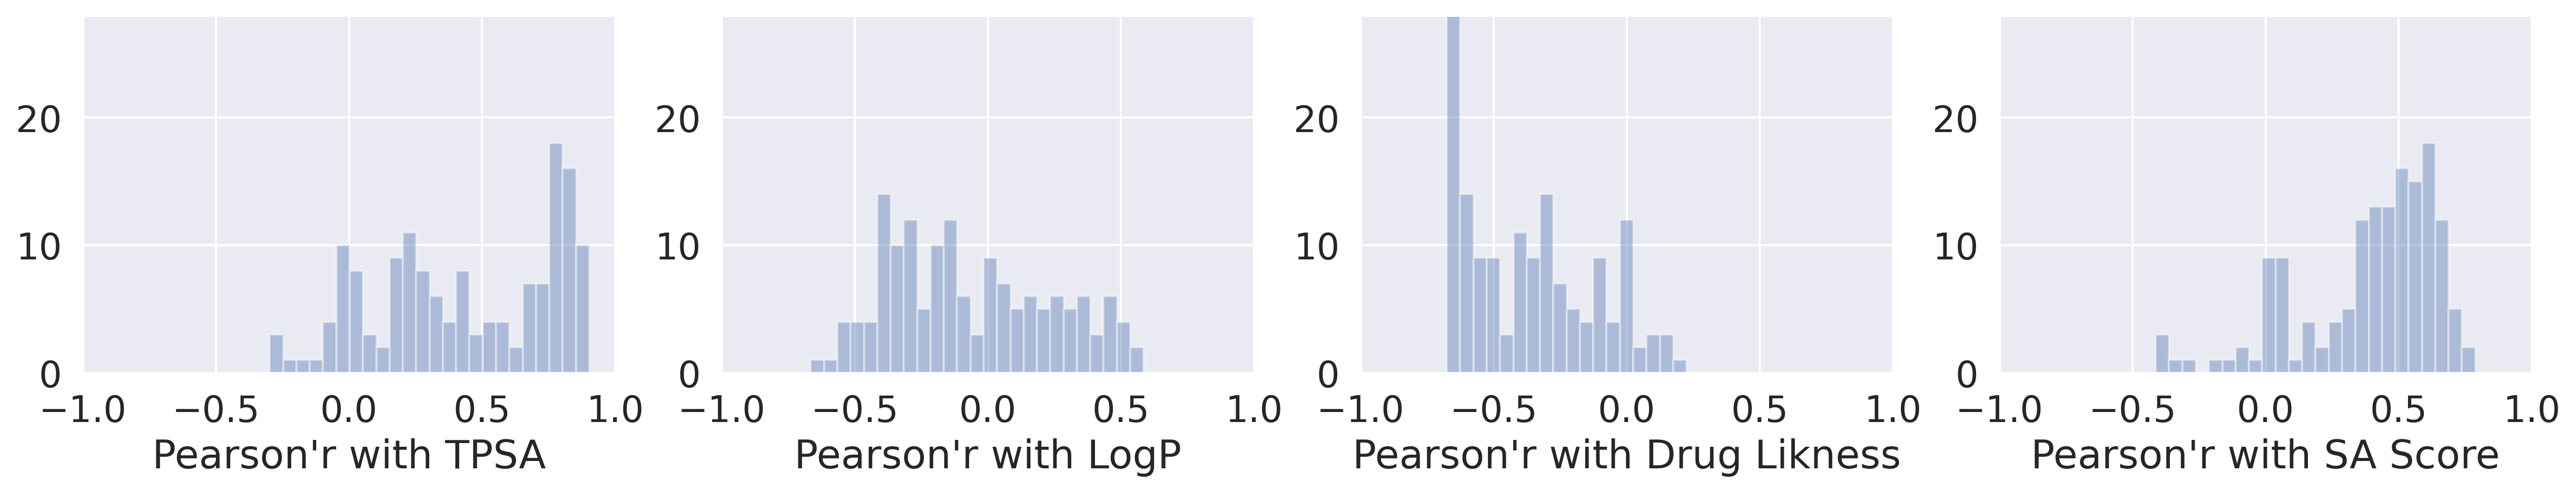

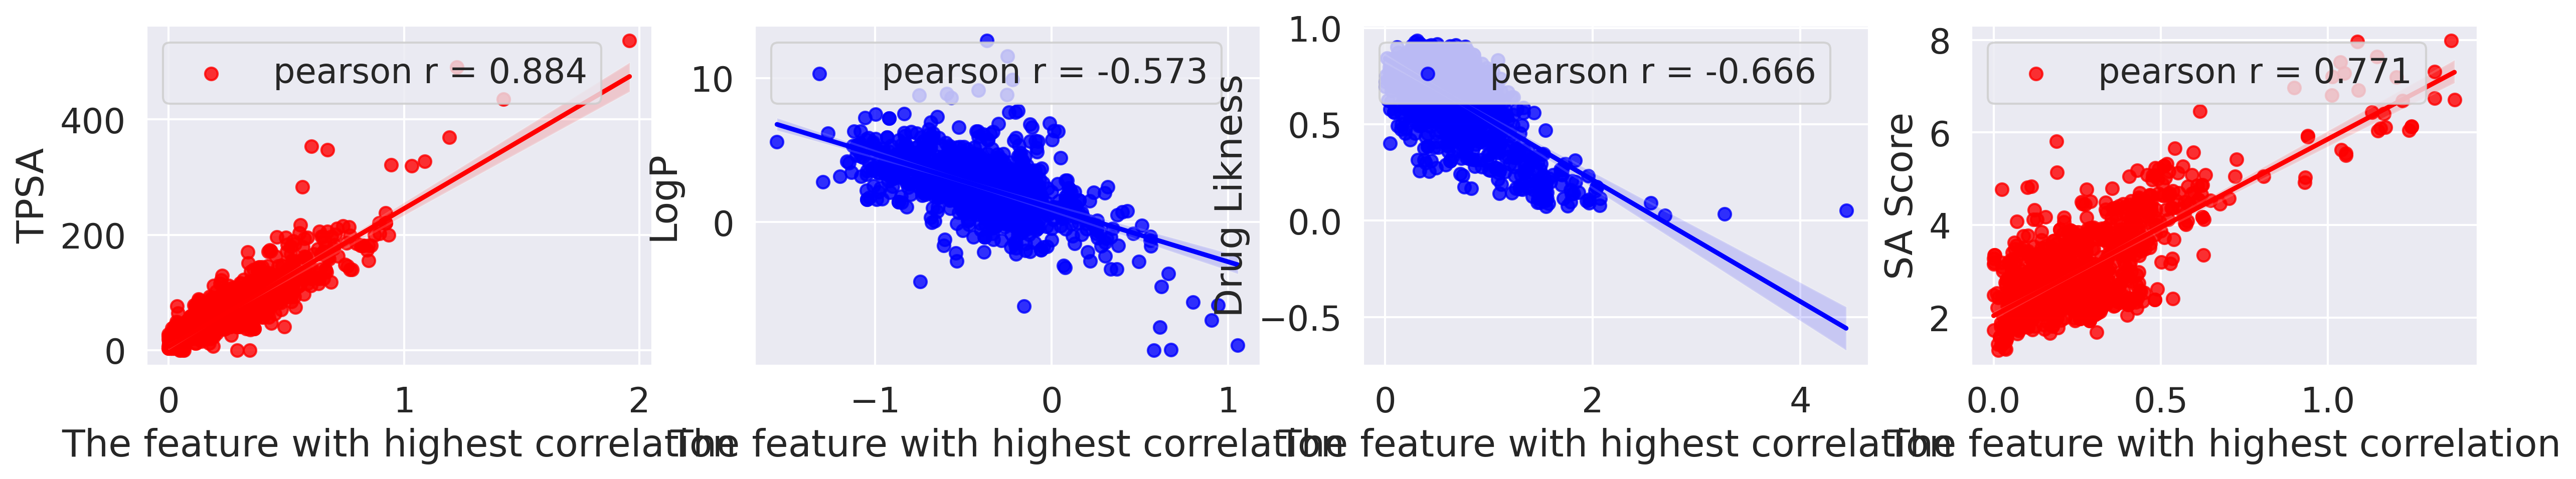

In [23]:
import scipy
from matplotlib import gridspec

mol_feature_sorted = np.array(mol_feature_sorted)
mol_feature_unbounded_sorted = np.array(mol_feature_unbounded_sorted)
# print(mol_feature_sorted.shape)
descriptors_name = ["TPSA", "LogP", "Drug Likness", "SA Score"]
descriptors = [mol_TPSA_list, mol_LogP_list, mol_DrugLike_list, mol_SAScore_list]


TPSA_r_list = np.array([scipy.stats.pearsonr(mol_feature_sorted[:,0,i], mol_TPSA_list)[0] for i in range(fingerprint_dim)])
DrugLike_r_list = np.array([scipy.stats.pearsonr(mol_feature_sorted[:,0,i], mol_DrugLike_list)[0] for i in range(fingerprint_dim)])
SAScore_r_list = np.array([scipy.stats.pearsonr(mol_feature_sorted[:,0,i], mol_SAScore_list)[0] for i in range(fingerprint_dim)])
LogP_r_list = np.array([scipy.stats.pearsonr(mol_feature_unbounded_sorted[:,0,i], mol_LogP_list)[0] for i in range(fingerprint_dim)])
correlation_list = np.array([TPSA_r_list, LogP_r_list, DrugLike_r_list, SAScore_r_list])
correlation_list[np.isnan(correlation_list)] = 0
# print(correlation_list.shape)

plt.figure(figsize=(20, 3),dpi=300)
gs = gridspec.GridSpec(1, 4)
sns.set(font_scale=1.5)

for i, name in enumerate(descriptors_name):
    # plot Peason's r distribution
    x = pd.Series(correlation_list[i], name="Pearson\'r with "+name)
    ax0 = plt.subplot(gs[(i)])
    b_width = 0.05  # chose an arbitrary value here
    bin_num = np.arange(min(x), max(x) + b_width, b_width)
    sns.distplot(x, bins=bin_num, kde=False, ax=ax0)
    ax0.set_xlim([-1, 1])
    ax0.set_ylim([0, 28])
plt.show()
plt.close()

# plot the feature with highest correlation
def get_highest_correlation(feature, descriptor, peason_r_list):
    if max(peason_r_list,key=abs) > 0:
        top_index = peason_r_list.argsort()[-1]
    else:
        top_index = peason_r_list.argsort()[1]
    top_r = peason_r_list[top_index]
    return top_r, feature[:,0,top_index]

top_r_TPSA, highest_with_TPSA = get_highest_correlation(mol_feature_sorted, descriptors[0], correlation_list[0])
top_r_LogP, highest_with_LogP = get_highest_correlation(mol_feature_unbounded_sorted, descriptors[1], correlation_list[1])
top_r_DrugLike, highest_with_DrugLike = get_highest_correlation(mol_feature_sorted, descriptors[2], correlation_list[2])
top_r_SAScore, highest_with_SAScore = get_highest_correlation(mol_feature_sorted, descriptors[3], correlation_list[3])
highest_correlated_feature = [highest_with_TPSA, highest_with_LogP, highest_with_DrugLike, highest_with_SAScore]
top_r_list = [top_r_TPSA, top_r_LogP, top_r_DrugLike, top_r_SAScore]

plt.figure(figsize=(20, 3),dpi=300)
gs = gridspec.GridSpec(1, 4)
for i, name in enumerate(descriptors_name):
    
    x, y = pd.Series(highest_correlated_feature[i], name="The feature with highest correlation"), pd.Series(descriptors[i], name=name)

    ax1 = plt.subplot(gs[(i)])
    if top_r_list[i] >0:
        sns.regplot(x=x, y=y, color="red", label='pearson r = '+str(np.around(top_r_list[i],decimals=3)),ax=ax1)
    else:
        sns.regplot(x=x, y=y, color="blue", label='pearson r = '+str(np.around(top_r_list[i],decimals=3)),ax=ax1)
    ax1.legend(loc='upper left')
    # plt.tight_layout()
plt.show()
plt.close()